Problem Statement: Bank Churn Prediction
-------------------------------------------------------------------------------------------------------------------------

### Objective:

Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not.

### Context:

Businesses like banks which provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Data Description:

The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance etc. Link to the Kaggle project site: https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling

### Points Distribution:

The points distribution for this case is as follows:




In [1]:
import warnings
import tensorflow as tf
import numpy as np
np.set_printoptions(threshold=np.inf)
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(palette="Set2")

from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler


/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### STEP 1
- Read the dataset

In [2]:
#Importing the dataset
dataset = pd.read_csv('bank.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [5]:
##  no NaN values in bank dataset

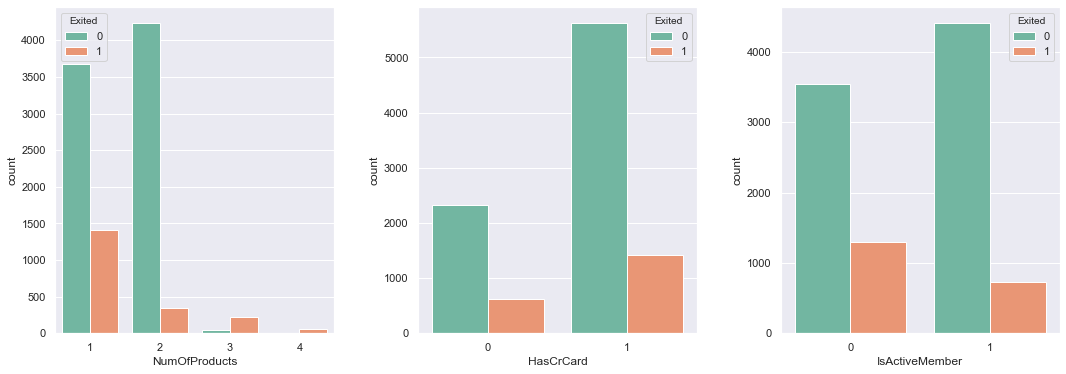

In [6]:
_,ax = plt.subplots(1, 3, figsize=(18, 6))
plt.subplots_adjust(wspace=0.3)
sns.countplot(x = "NumOfProducts", hue="Exited", data = dataset, ax= ax[0])
sns.countplot(x = "HasCrCard", hue="Exited", data = dataset, ax = ax[1])
sns.countplot(x = "IsActiveMember", hue="Exited", data = dataset, ax = ax[2])

#### Observation: Customer with 3 or 4 products are higher chances to Churn

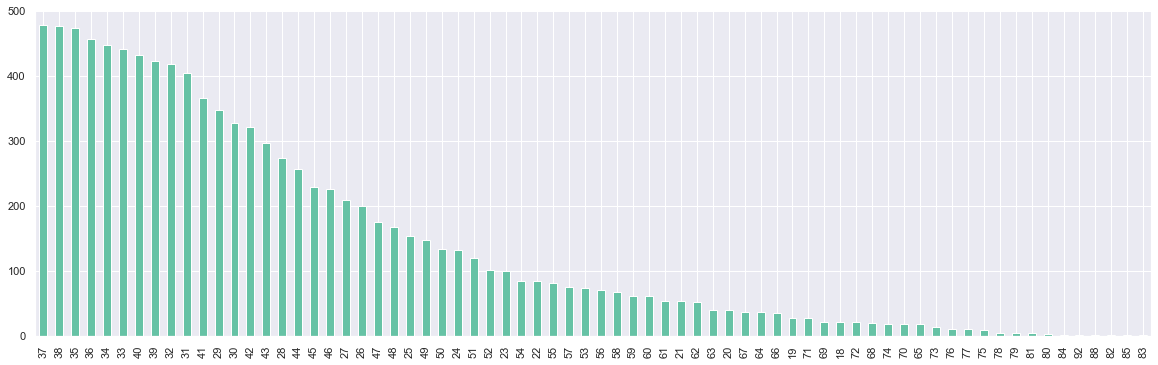

In [7]:
dataset["Age"].value_counts().plot.bar(figsize=(20,6))

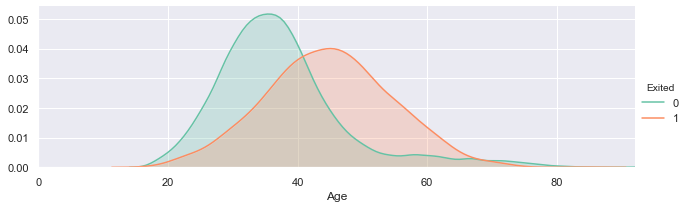

In [8]:
facet = sns.FacetGrid(dataset, hue="Exited",aspect=3)
facet.map(sns.kdeplot,"Age",shade= True)
facet.set(xlim=(0, dataset["Age"].max()))
facet.add_legend()

plt.show()

#### Observation : 40 to 70 years old customers are higher chances to churn

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


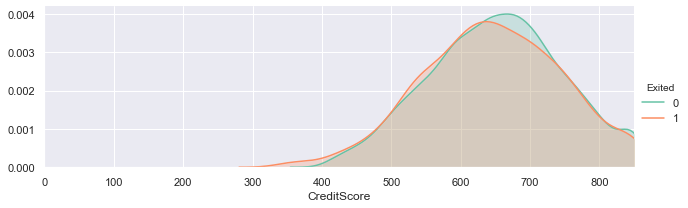

In [10]:
facet = sns.FacetGrid(dataset, hue="Exited",aspect=3)
facet.map(sns.kdeplot,"CreditScore",shade= True)
facet.set(xlim=(0, dataset["CreditScore"].max()))
facet.add_legend()

plt.show()

#### Observation : Customer with CreditScore less then 400 are higher chances to churn

### STEP 2
- Drop the columns which are unique for all users like IDs (5points)


In [11]:
dataset.drop(["RowNumber","CustomerId","Surname"],inplace=True, axis=1)
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
# Deopping first 3 colums : RowNumber, CustomerId and Surname

X = dataset.iloc[:, :-1]
y = dataset["Exited"]



In [13]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


### STEP 3
- Distinguish the features and target variable(5points)


In [14]:
# Encoding categorical data
# Encoding the Independent Variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Geography
labelencoder_X = LabelEncoder()


X["Geography"] = labelencoder_X.fit_transform(X["Geography"])
X["Gender"] = labelencoder_X.fit_transform(X["Gender"])




X.head()



,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [15]:

# Giving ordinal feature to our variables
onehotencoder = OneHotEncoder(categorical_features = [1])
X = onehotencoder.fit_transform(X).toarray()
X = X[:, 1:]
print(X[:10,:], '\n')
print(y[:10])

[[0.0000000e+00 0.0000000e+00 6.1900000e+02 0.0000000e+00 4.2000000e+01
  2.0000000e+00 0.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00
  1.0134888e+05]
 [0.0000000e+00 1.0000000e+00 6.0800000e+02 0.0000000e+00 4.1000000e+01
  1.0000000e+00 8.3807860e+04 1.0000000e+00 0.0000000e+00 1.0000000e+00
  1.1254258e+05]
 [0.0000000e+00 0.0000000e+00 5.0200000e+02 0.0000000e+00 4.2000000e+01
  8.0000000e+00 1.5966080e+05 3.0000000e+00 1.0000000e+00 0.0000000e+00
  1.1393157e+05]
 [0.0000000e+00 0.0000000e+00 6.9900000e+02 0.0000000e+00 3.9000000e+01
  1.0000000e+00 0.0000000e+00 2.0000000e+00 0.0000000e+00 0.0000000e+00
  9.3826630e+04]
 [0.0000000e+00 1.0000000e+00 8.5000000e+02 0.0000000e+00 4.3000000e+01
  2.0000000e+00 1.2551082e+05 1.0000000e+00 1.0000000e+00 1.0000000e+00
  7.9084100e+04]
 [0.0000000e+00 1.0000000e+00 6.4500000e+02 1.0000000e+00 4.4000000e+01
  8.0000000e+00 1.1375578e+05 2.0000000e+00 1.0000000e+00 0.0000000e+00
  1.4975671e+05]
 [0.0000000e+00 0.0000000e+00 8.22

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


### STEP 4
- Divide the data set into training and test sets (5points)


In [16]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


### STEP 5
- Normalize the train and test data (10points)


In [17]:
# Feature Scaling (very important)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### STEP 6
- Initialize & build the model. Identify the points of improvement and implement the same. Note that you need to demonstrate at least two models(the original and the improved one) and highlight the differences to complete this point. You can also demonstrate more models. (20points)


In [ ]:
##Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
classifier_log=LogisticRegression()

In [33]:
classifier_log.fit(X_train, y_train)
Y_pred=classifier_log.predict(X_test)
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,Y_pred)
cm



/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[1526,   69],
       [ 309,   96]])

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,Y_pred)

0.811

In [ ]:
#DNN

In [60]:
#Initialising the ANN - Defining as a sequence of layers or a Graph
classifier = tf.keras.models.Sequential()

#Input Layer
classifier.add(tf.keras.layers.Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11 ))


classifier.add(tf.keras.layers.Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))


classifier.compile(optimizer = 'adam',loss= 'binary_crossentropy',metrics=['accuracy'])

In [61]:
classifier_history=classifier.fit(np.asarray(X_train), np.asarray(y_train), batch_size = 10, epochs = 100 ,verbose=0 )

In [62]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1490,  105],
       [ 191,  214]])

In [63]:

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.852

In [ ]:
    ##ADD ONE MORE LAYER OF NN

In [35]:
#Initialising the ANN - Defining as a sequence of layers or a Graph
classifier2 = tf.keras.models.Sequential()

#Input Layer
classifier2.add(tf.keras.layers.Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11 ))

classifier2.add(tf.keras.layers.Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

classifier2.add(tf.keras.layers.Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))


classifier2.compile(optimizer = 'rmsprop',loss= 'binary_crossentropy',metrics=['accuracy'])

In [36]:
classifier2.fit(np.asarray(X_train), np.asarray(y_train), batch_size = 25, epochs = 100 ,verbose=0 )

### STEP 7
- Predict the results using 0.5 as a threshold. Note that you need to first predict the probability and then predict classes using the given threshold (10points)


In [47]:
#the prediction returns the probability, we are taking the probability above 0.5 to see wether a customer will stay in the bank or not
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [48]:
#the prediction returns the probability, we are taking the probability above 0.5 to see wether a customer will stay in the bank or not
y_pred2 = classifier2.predict(X_test)
y_pred2 = (y_pred > 0.5)

### STEP 8
- Print the Accuracy score and confusion matrix (5points)

In [49]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1546,   49],
       [ 223,  182]])

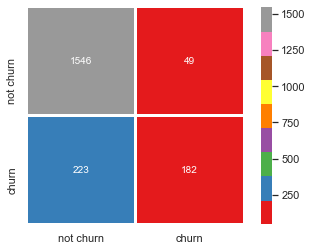

In [50]:
sns.heatmap(cm,annot=True,fmt = "d",square = True,
 xticklabels=["not churn","churn"],
 yticklabels=["not churn","churn"],
 linewidths = 2,linecolor = "w",cmap = "Set1")
plt.subplots_adjust(wspace = .3,hspace = .3)

In [51]:

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.864

In [52]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred2)
cm

array([[1546,   49],
       [ 223,  182]])

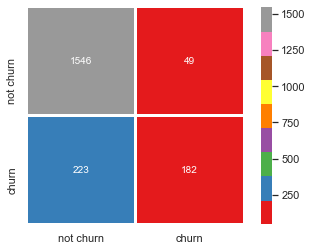

In [53]:
sns.heatmap(cm,annot=True,fmt = "d",square = True,
 xticklabels=["not churn","churn"],
 yticklabels=["not churn","churn"],
 linewidths = 2,linecolor = "w",cmap = "Set1")
plt.subplots_adjust(wspace = .3,hspace = .3)

In [54]:

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred2)

0.864